**Задание 2**

Используя набор данных на листе «Training» (см. Задания_1_2.xlsx)   в качестве обучающей выборки, предсказать значения целевой переменной Target для набора данных на листе «Validate».  Пояснить выбор метода. Привести оценки точности и качества предиктивной модели. Построить ROC-кривую. Назвать три наиболее важных предиктора.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from random import randint
import warnings
warnings.filterwarnings('ignore')
random_state = 12345

In [2]:
data_train = pd.read_excel("Задания_1_2.xlsx", sheet_name = 'Training')
data_test = pd.read_excel("Задания_1_2.xlsx", sheet_name = 'Validate')

### Предобработка data_train

In [3]:
#Исследуем data_train
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10000 non-null  int64  
 1   Target  10000 non-null  int64  
 2   P1      10000 non-null  float64
 3   P2      8492 non-null   float64
 4   P3      8523 non-null   float64
 5   P4      10000 non-null  int64  
 6   P5      10000 non-null  int64  
 7   P6      10000 non-null  float64
 8   P7      10000 non-null  float64
 9   P8      8482 non-null   float64
 10  P9      10000 non-null  float64
 11  P10     10000 non-null  float64
 12  P11     10000 non-null  float64
 13  P12     10000 non-null  float64
 14  P13     10000 non-null  float64
 15  P14     10000 non-null  float64
 16  P15     10000 non-null  float64
 17  P16     8475 non-null   float64
 18  P17     10000 non-null  float64
 19  P18     10000 non-null  float64
 20  P19     10000 non-null  float64
 21  P20     10000 non-null  float64
 22 

In [4]:
data_train.head()

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
0,283,1,0.0,NaN,NaN,10,0,1.02273,1.01608,1.55268,...,831.68333,783.81667,171.33333,818.15000,0.62772,0.13333,0.00000,6.41893,0.97122,6.41893
1,342,0,0.0,30.00000,6.80153,0,0,1.00000,1.65348,1.14852,...,195.13889,168.30000,81.00000,NaN,6.32407,0.26667,0.33333,NaN,1.60714,3.44800
2,631,0,0.0,30.00000,9.60267,0,0,1.00000,0.84143,NaN,...,226.10556,207.41667,110.00000,184.49444,2.25635,0.00000,0.06667,NaN,0.75000,8.08000
3,1165,0,0.0,30.33333,15.32553,0,0,0.98901,0.88114,NaN,...,567.53889,441.52778,194.00000,625.32222,2.74469,0.13333,0.40000,13.50400,0.98119,13.50400
4,1469,0,0.0,28.00000,7.54133,0,0,0.92857,1.21447,0.60138,...,154.80556,86.64444,71.66667,53.45000,0.91130,0.46667,0.40000,NaN,0.40171,3.44800


In [5]:
#Приведем все названия столбцов к нижнему регистру
data_train.columns = data_train.columns.str.lower()
#Проверим
data_train.columns

Index(['id', 'target', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9',
       'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19',
       'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29',
       'p30', 'p31'],
      dtype='object')

In [6]:
#Проверим на наличие пропусков
data_train.isna().sum()

id           0
target       0
p1           0
p2        1508
p3        1477
p4           0
p5           0
p6           0
p7           0
p8        1518
p9           0
p10          0
p11          0
p12          0
p13          0
p14          0
p15          0
p16       1525
p17          0
p18          0
p19          0
p20          0
p21          0
p22          0
p23          0
p24          0
p25       1504
p26          0
p27          0
p28          0
p29       1533
p30          0
p31          0
dtype: int64

Пропуски присутствуют по нескольким признакам, для того, чтобы понять, чем заполнять пропуски, посмотрим на характеристики данных признаков

In [7]:
fill_names = ['p2', 'p3', 'p8', 'p16', 'p25', 'p29']
data_train[fill_names].describe()

,p2,p3,p8,p16,p25,p29
count,8492.000000,8523.000000,8482.000000,8475.000000,8496.000000,8467.000000
mean,24.972718,14.497498,0.875107,3.033263,268.877144,9.048853
std,7.537203,10.703977,0.524680,2.145360,355.736543,5.529335
min,1.000000,0.723030,0.000000,0.200000,0.000000,0.000000
25%,22.333330,8.004265,0.592615,0.866670,47.193053,4.320000
50%,28.666670,12.532000,0.883840,2.866670,146.880555,9.115600
75%,30.333330,18.522270,1.129363,5.000000,346.656943,9.920000
max,30.333330,287.935870,3.000000,8.233330,5339.972220,96.288000


Поскольку по некоторым признакам присутствуют явно выбивающиеся значения, заполним пропуски медианой

In [8]:
for name in fill_names:
    median_value = data_train[name].median()
    data_train[name] = data_train[name].fillna(median_value)

In [9]:
#Проверим
data_train.isna().sum()

id        0
target    0
p1        0
p2        0
p3        0
p4        0
p5        0
p6        0
p7        0
p8        0
p9        0
p10       0
p11       0
p12       0
p13       0
p14       0
p15       0
p16       0
p17       0
p18       0
p19       0
p20       0
p21       0
p22       0
p23       0
p24       0
p25       0
p26       0
p27       0
p28       0
p29       0
p30       0
p31       0
dtype: int64

In [10]:
#Проверим на дубликаты
data_train.duplicated().sum()

0

<AxesSubplot:>

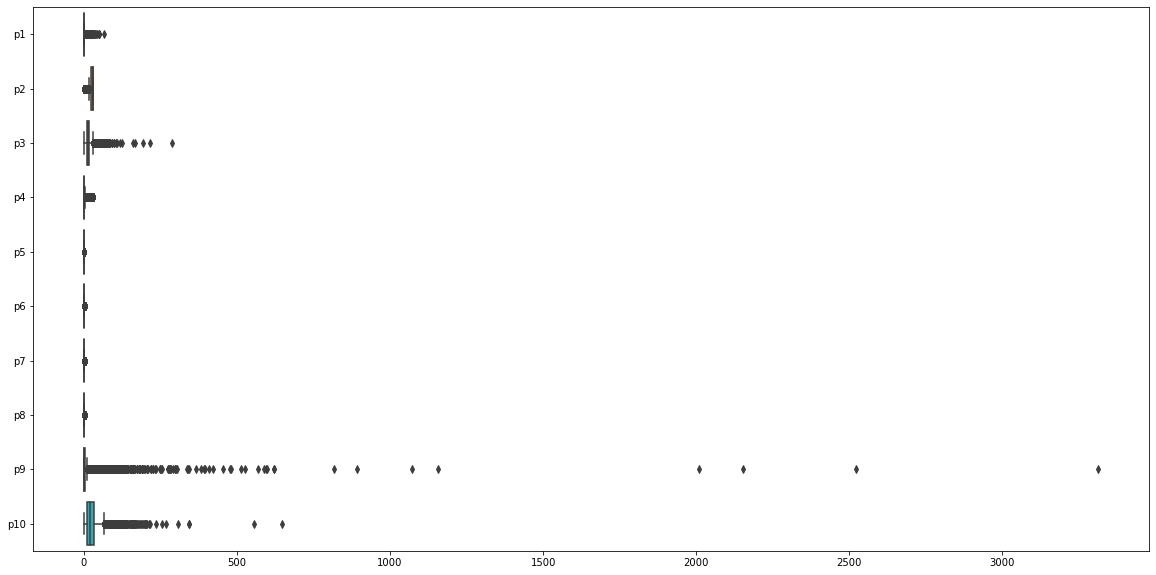

In [11]:
#Исследуем аномалии
plt.figure(figsize=(20,10))
sns.boxplot(data=data_train.loc[:, 'p1':'p10'], orient='h')

<AxesSubplot:>

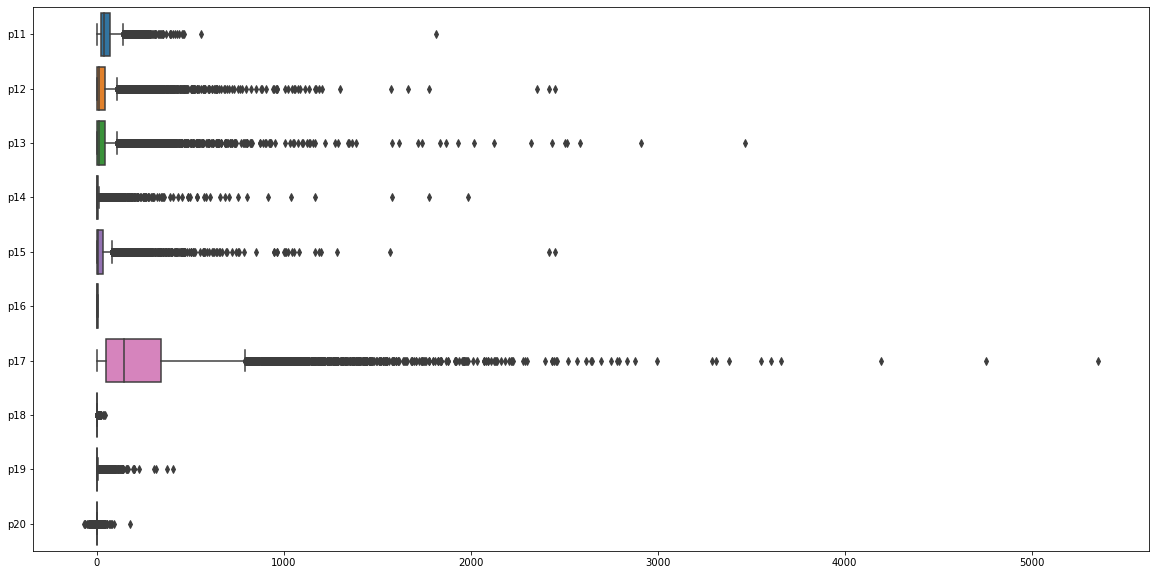

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_train.loc[:, 'p11':'p20'], orient='h')

<AxesSubplot:>

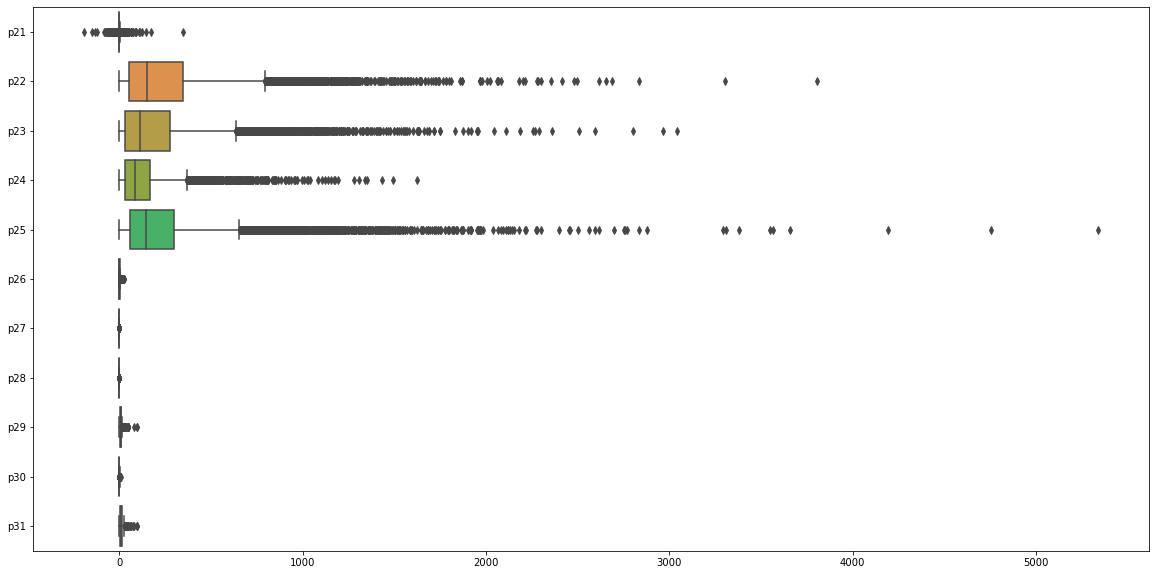

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_train.loc[:, 'p21':'p31'], orient='h')

По многим признакам присутствуют явные аномалии. Рассмотрим подробнее отдельные из них и уберем слишком выбивающиеся значения из выборки.

<AxesSubplot:>

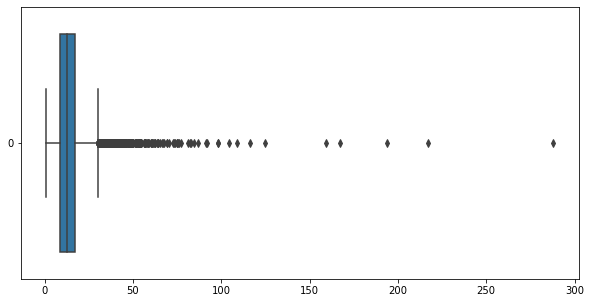

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data_train['p3'], orient='h')

In [15]:
len(data_train[data_train['p3'] > 100])

9

<AxesSubplot:>

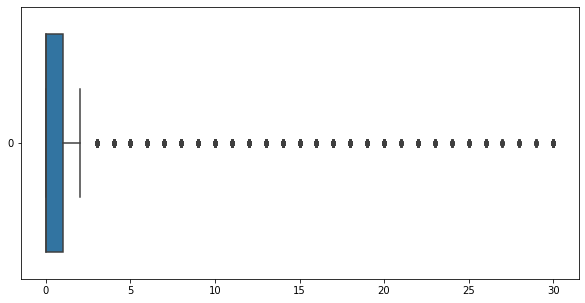

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data_train['p4'], orient='h')

In [17]:
len(data_train[data_train['p4'] > 29])

95

<AxesSubplot:>

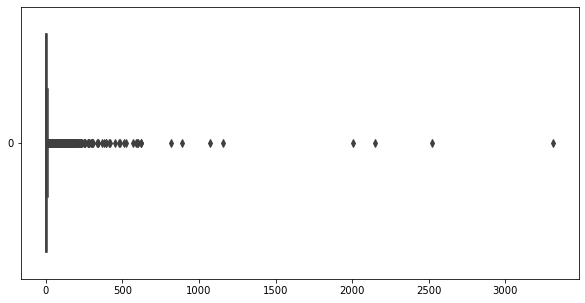

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data_train['p9'], orient='h')

In [19]:
len(data_train[data_train['p9'] > 2500])

2

<AxesSubplot:>

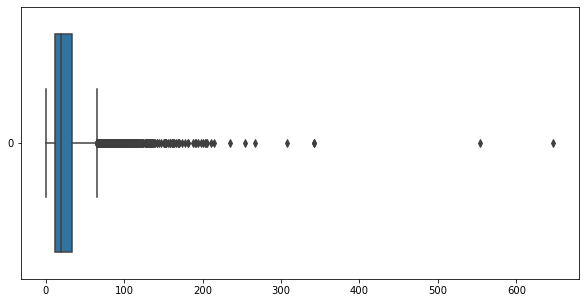

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data_train['p10'], orient='h')

In [21]:
len(data_train[data_train['p10'] > 300])

5

In [22]:
#Данные признаки имеют примерно одинаковые единицы измерения, рассмотрим их вместе 
anomal_features = ['p11', 'p12', 'p13', 'p14', 'p15', 'p17', 'p22', 'p23', 'p24', 'p25']
for feature in anomal_features:
    print(feature, len(data_train[data_train[feature] > 1700]))

p11 1
p12 4
p13 14
p14 2
p15 2
p17 90
p22 40
p23 23
p24 0
p25 76


Удалим объекты где:
- p3 > 100
- p9 > 2500
- p10 > 300
- p11-p15 > 1700
- p17 > 1700
- p22-p25 > 1700

In [23]:
data_train = data_train[
    (data_train['p3'] < 100) &\
    (data_train['p9'] < 2500) &\
    (data_train['p10'] < 300) &\
    (data_train['p11'] < 1700) &\
    (data_train['p12'] < 1700) &\
    (data_train['p13'] < 1700) &\
    (data_train['p14'] < 1700) &\
    (data_train['p15'] < 1700) &\
    (data_train['p17'] < 1700) &\
    (data_train['p22'] < 1700) &\
    (data_train['p23'] < 1700) &\
    (data_train['p24'] < 1700) &\
    (data_train['p25'] < 1700) 
 ]

In [24]:
print("Количество объектов после обрезки аномалий:", len(data_train))

Количество объектов после обрезки аномалий: 9868


In [25]:
#Исследуем признаки на наличие корреляции
def correlation(data):
    column_list_pair = []
    column_list = []
    for i in data.columns:
        for j in data.columns:
            coeff_cor = data[i].corr(data[j])
            if i != j and {i,j} not in column_list_pair:
                if coeff_cor > 0.7:
                    column_list_pair.append({i,j})
                    column_list.append(i)
    return column_list_pair, column_list

In [26]:
column_list_pair, column_list = correlation(data_train.loc[:, 'p1':'p31'])
print("Пары признаков с высокой корреляцией для x_train:", column_list_pair)

Пары признаков с высокой корреляцией для x_train: [{'p1', 'p5'}, {'p7', 'p21'}, {'p9', 'p19'}, {'p10', 'p24'}, {'p12', 'p15'}, {'p17', 'p22'}, {'p17', 'p24'}, {'p17', 'p25'}, {'p23', 'p22'}, {'p24', 'p25'}, {'p27', 'p28'}, {'p29', 'p31'}]


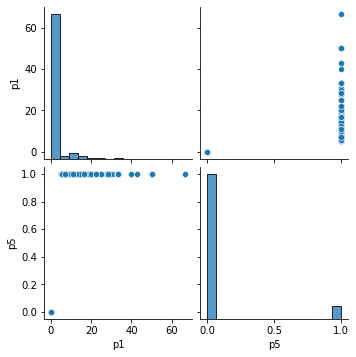

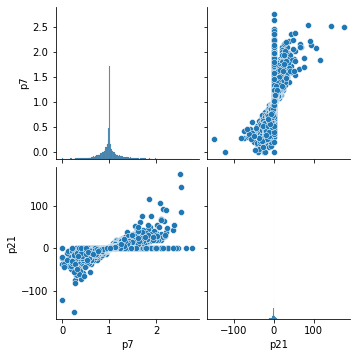

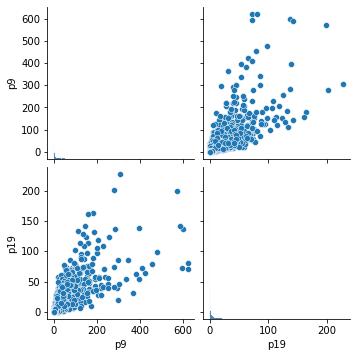

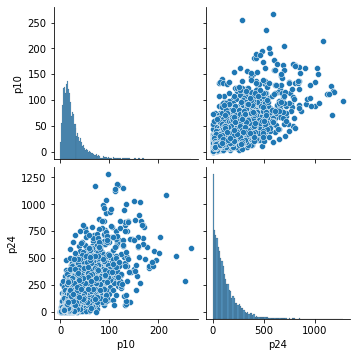

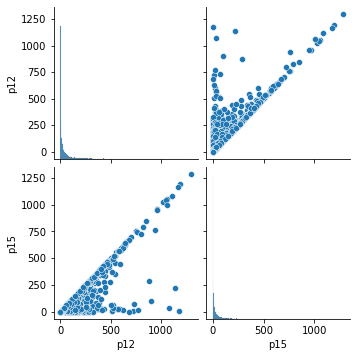

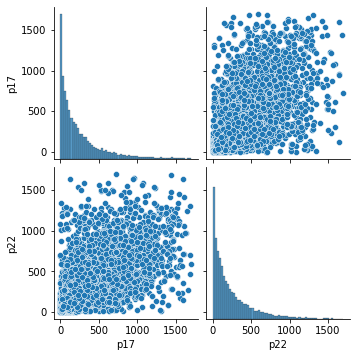

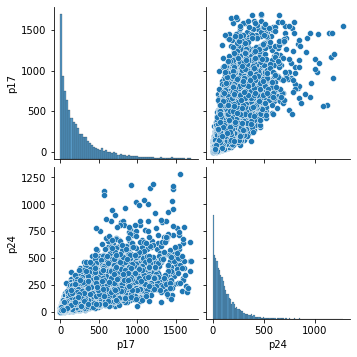

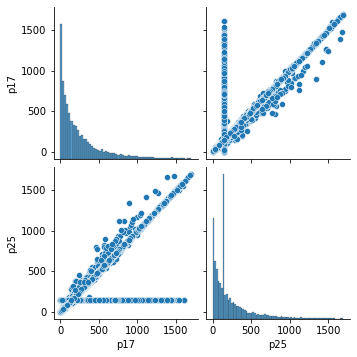

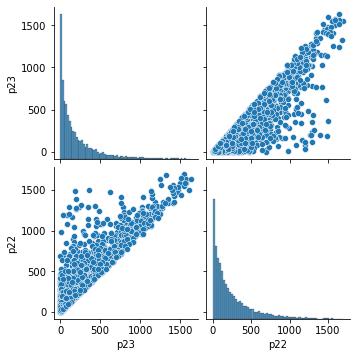

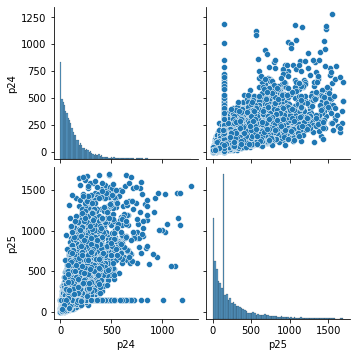

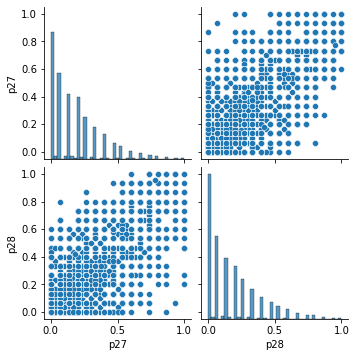

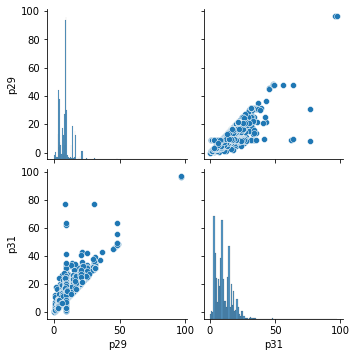

In [27]:
#Визуализируем эти зависимотси
for pair in column_list_pair:
    sns.pairplot(data=data_train[list(pair)])

In [28]:
#Удалим по одному признаку из этой пары(кроме нескольких) из data_train
data_train = data_train.drop(column_list[1:], axis=1)

In [29]:
#Проверим
data_train.columns

Index(['id', 'target', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p8', 'p11', 'p13',
       'p14', 'p15', 'p16', 'p18', 'p19', 'p20', 'p21', 'p23', 'p25', 'p26',
       'p28', 'p30', 'p31'],
      dtype='object')

In [30]:
features = data_train.drop(['id', 'target'], axis=1)
target = data_train['target']

In [31]:
#Разделим data_train на обучающую и валидационную выборку, валидационная нужна для подбора параметров модели. Разделим с с параметром stratify для того, чтобы сохранить изнчальное распределение целевого признака. 
x_train, x_valid, y_train, y_valid = train_test_split(features, target, test_size = 0.25, random_state=random_state, stratify=target)

In [32]:
print(np.bincount(y_train))
print(np.bincount(y_valid))

[3679 3722]
[1226 1241]


In [33]:
#Масштабируем признаки
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
scaler.fit(x_valid)
x_valid = pd.DataFrame(scaler.transform(x_valid))

In [34]:
#Исследуем баланс классов в data_train
print('Количество объектов отрицательного класса:',len(data_train[data_train['target'] == 0]))
print('Количество объектов положительного класса:', len(data_train[data_train['target'] == 1]))

Количество объектов отрицательного класса: 4905
Количество объектов положительного класса: 4963


Баланс классов присутствует, когда соотношение классов в выборке примерно 1:1. В нашем случае классы сбалансированны

### Предобработка data_test

In [35]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      20000 non-null  int64  
 1   Target  0 non-null      float64
 2   P1      20000 non-null  float64
 3   P2      17032 non-null  float64
 4   P3      17021 non-null  float64
 5   P4      20000 non-null  int64  
 6   P5      20000 non-null  int64  
 7   P6      20000 non-null  float64
 8   P7      20000 non-null  float64
 9   P8      16985 non-null  float64
 10  P9      20000 non-null  float64
 11  P10     20000 non-null  float64
 12  P11     20000 non-null  float64
 13  P12     20000 non-null  float64
 14  P13     20000 non-null  float64
 15  P14     20000 non-null  float64
 16  P15     20000 non-null  float64
 17  P16     16997 non-null  float64
 18  P17     20000 non-null  float64
 19  P18     20000 non-null  float64
 20  P19     20000 non-null  float64
 21  P20     20000 non-null  float64
 22

In [36]:
data_test.head()

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
0,127,NaN,0.0,30.33333,8.86883,0,0,0.98901,1.01885,1.31226,...,85.59444,32.45000,41.00000,95.39444,4.64779,0.40000,0.73333,8.256,0.11725,8.256
1,214,NaN,0.0,30.33333,12.82570,0,0,0.98901,0.96587,0.94475,...,809.37778,787.77778,164.66667,239.95000,2.34907,0.00000,0.00000,4.320,1.33333,10.000
2,542,NaN,0.0,9.00000,5.25643,0,0,0.88889,0.97863,1.68000,...,26.34444,25.89444,1.33333,1.26667,0.43333,0.13333,0.06667,5.096,1.16688,5.096
3,674,NaN,0.0,24.33333,NaN,0,0,0.90411,0.88409,0.58490,...,116.31111,73.20000,27.33333,34.62222,0.69722,0.33333,0.13333,4.712,1.80000,4.712
4,756,NaN,0.0,30.33333,21.90167,0,0,0.98901,1.02636,1.30082,...,275.16111,201.13889,285.00000,369.42778,1.36109,0.13333,0.13333,21.096,0.00000,21.096


In [37]:
data_test.columns = data_test.columns.str.lower()
data_test.columns

Index(['id', 'target', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9',
       'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19',
       'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29',
       'p30', 'p31'],
      dtype='object')

In [38]:
#Удалим пустое поле с целевым признаком и id
data_test = data_test.drop(['id', 'target'], axis=1)
#Также удалим поля, которые были удалены из data_train при исследовании корреляции. Для того, чтобы признаки в data_train и fata_test были одинаковыми
data_test = data_test.drop(column_list[1:], axis=1)

In [39]:
data_test.isna().sum()

p1        0
p2     2968
p3     2979
p4        0
p5        0
p6        0
p8     3015
p11       0
p13       0
p14       0
p15       0
p16    3003
p18       0
p19       0
p20       0
p21       0
p23       0
p25    3021
p26       0
p28       0
p30       0
p31       0
dtype: int64

In [40]:
fill_names = ['p2', 'p3', 'p8', 'p16', 'p25']
data_test[fill_names].describe()

,p2,p3,p8,p16,p25
count,17032.000000,17021.000000,16985.000000,16997.000000,16979.000000
mean,27.106759,15.227795,0.935037,4.359001,341.172861
std,5.690590,12.372809,0.401409,1.680314,392.293345
min,1.000000,0.784000,0.000000,0.266670,0.000000
25%,26.666670,8.672130,0.731150,3.000000,84.702775
50%,29.666670,13.440000,0.929970,4.600000,219.750000
75%,30.333330,18.824930,1.124010,5.700000,449.169445
max,30.333330,409.205170,3.000000,8.233330,4875.088890


In [41]:
for name in fill_names:
    median_value = data_test[name].median()
    data_test[name] = data_test[name].fillna(median_value)

In [42]:
data_test.isna().sum()

p1     0
p2     0
p3     0
p4     0
p5     0
p6     0
p8     0
p11    0
p13    0
p14    0
p15    0
p16    0
p18    0
p19    0
p20    0
p21    0
p23    0
p25    0
p26    0
p28    0
p30    0
p31    0
dtype: int64

In [43]:
data_test.duplicated().sum()

0

<AxesSubplot:>

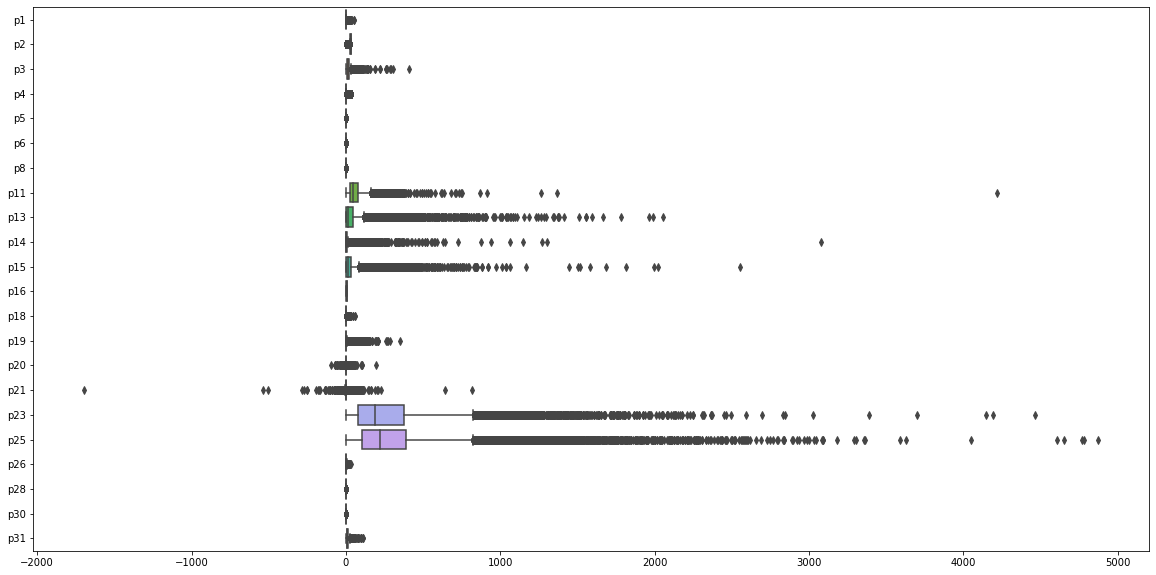

In [44]:
#Обработаем аномалии
plt.figure(figsize=(20,10))
sns.boxplot(data=data_test.loc[:, 'p1':'p31'], orient='h')

<AxesSubplot:>

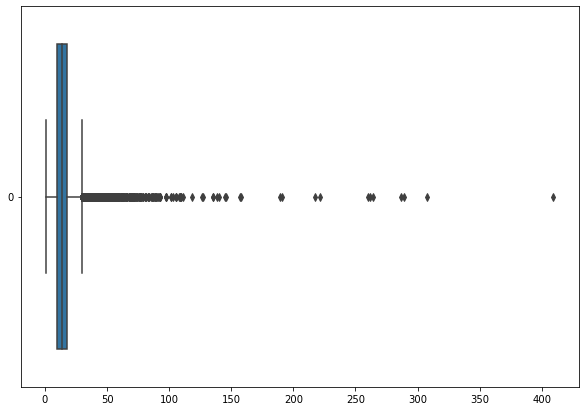

In [45]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data_test['p3'], orient='h')

In [46]:
print(len(data_test[data_test['p3'] > 170]))
print(len(data_test[data_test['p11'] > 1500]))
print(len(data_test[data_test['p13'] > 1500]))
print(len(data_test[data_test['p14'] > 1500]))
print(len(data_test[data_test['p15'] > 1500]))
print(len(data_test[data_test['p23'] > 2700]))
print(len(data_test[data_test['p25'] > 2700]))

11
1
9
1
8
8
33


Заменим значения признаков на объектах, где:

- p3 > 170
- p11 > 1500
- p13-p15 > 1500
- p23, p25 > 2700

медианой по соответствующему столбцу

In [47]:
def anomaly_p3(value):
    if value > 170:
        return data_test['p3'].median()
    else:
        return value
def anomaly_p11(value):
    if value > 1500:
        return data_test['p11'].median()
    else:
        return value
def anomaly_p13(value):
    if value > 1500:
        return data_test['p13'].median()
    else:
        return value
def anomaly_p14(value):
    if value > 1500:
        return data_test['p14'].median()
    else:
        return value
def anomaly_p15(value):
    if value > 1500:
        return data_test['p15'].median()
    else:
        return value
def anomaly_p23(value):
    if value > 2700:
        return data_test['p23'].median()
    else:
        return value
def anomaly_p25(value):
    if value > 1500:
        return data_test['p25'].median()
    else:
        return value

In [48]:
data_test['p3'] = data_test['p3'].apply(anomaly_p3)
data_test['p11'] = data_test['p11'].apply(anomaly_p11)
data_test['p13'] = data_test['p13'].apply(anomaly_p13)
data_test['p14'] = data_test['p14'].apply(anomaly_p14)
data_test['p15'] = data_test['p15'].apply(anomaly_p15)
data_test['p23'] = data_test['p23'].apply(anomaly_p23)
data_test['p25'] = data_test['p25'].apply(anomaly_p25)

In [49]:
#Посмотрим коррелируют ли оставшиеся в data_test выборки
column_list_pair, column_list = correlation(data_test)

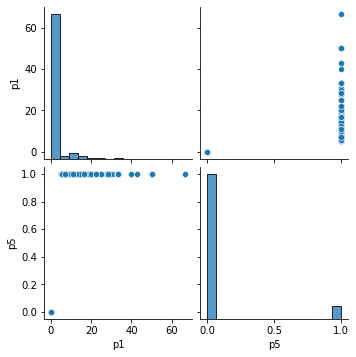

In [50]:
for pair in column_list_pair:
    sns.pairplot(data=data_train[list(pair)])

Не будем удалять ни один из пары коррелирубщих признаков

In [51]:
#Скалируем x_test
x_test = data_test.copy()
scaler.fit(x_test)
x_test = pd.DataFrame(scaler.transform(x_test))

### Построение моделей

Построим 3 модели:  RandomForedtClassifier, LogisticRegression, DecissionTreeClassifier, подберем параметры по GridSearcCV, качество оценим при помощи accuracy, roc-auc, выберем наилучшую модель и построим предсказания для x_test.

In [52]:
#Создаем функция для подбора параметров с помощью GridSearchCV
def selection(model, parameters):
    clf = GridSearchCV(model, parameters, verbose=1)
    clf.fit(x_train, y_train)
    return(clf.best_params_)

In [53]:
#Функция для отрисовки roc-кривой
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [54]:
parameters = {
    "max_depth": [randint(1,16)],
    "random_state": [random_state],
    "criterion": ["giny", "entropy"]
}
print(selection(DecisionTreeClassifier(), parameters))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'criterion': 'entropy', 'max_depth': 4, 'random_state': 12345}


Точность модели 0.6696392379408188
ROC-AUC_score 0.7110760279887951


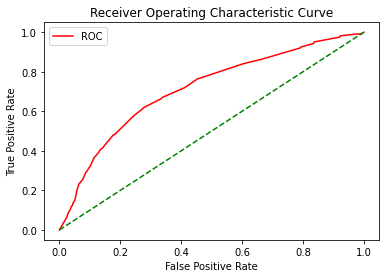

In [55]:
model_tree = DecisionTreeClassifier(random_state=random_state, max_depth=7, criterion='entropy')
model_tree.fit(x_train, y_train)
predictions = model_tree.predict(x_valid)
predictions_proba = model_tree.predict_proba(x_valid)
print("Точность модели", accuracy_score(y_valid, predictions))
print("ROC-AUC_score", roc_auc_score(y_valid, predictions_proba[:, 1]))
fper, tper, thresholds = roc_curve(y_valid, predictions_proba[:, 1])
plot_roc_curve(fper, tper)

In [56]:
parameters = {
    "max_depth": [randint(1,16)],
    "n_estimators": [randint(1,101)],
    "random_state": [random_state],
    "criterion": ["giny", "entropy"]
}
print(selection(RandomForestClassifier(), parameters))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 30, 'random_state': 12345}


Точность модели 0.6380218889339279
ROC-AUC_score 0.6960270554846444


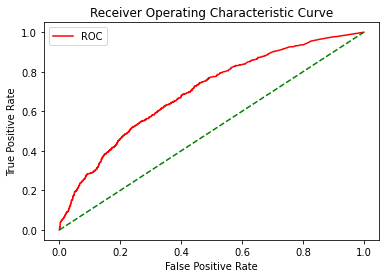

In [57]:
model_forest = RandomForestClassifier(max_depth=1, n_estimators=65, random_state=random_state, criterion='entropy')
model_forest.fit(x_train, y_train)
predictions = model_forest.predict(x_valid)
predictions_proba = model_forest.predict_proba(x_valid)
print("Точность модели", accuracy_score(y_valid, predictions))
print("ROC-AUC_score", roc_auc_score(y_valid, predictions_proba[:,1]))
fper, tper, thresholds = roc_curve(y_valid, predictions_proba[:, 1])
plot_roc_curve(fper, tper)

In [58]:
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [randint(1,51)],
    'random_state': [random_state]
}
print(selection(LogisticRegression(), parameters))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'C': 16, 'penalty': 'l2', 'random_state': 12345}


Точность модели 0.6813944061613295
ROC-AUC_score 0.7394348608513106


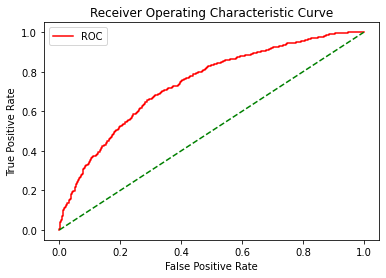

In [59]:
model_regression = LogisticRegression(penalty='l2', C=25, random_state=random_state)
model_regression.fit(x_train, y_train)
predictions = model_regression.predict(x_valid)
predictions_proba = model_regression.predict_proba(x_valid)
print("Точность модели", accuracy_score(y_valid, predictions))
print("ROC-AUC_score", roc_auc_score(y_valid, predictions_proba[:,1]))
fper, tper, thresholds = roc_curve(y_valid, predictions_proba[:, 1])
plot_roc_curve(fper, tper)

Наилучшее точность и качество показала модель логистической регрессии с параметрами penalty='l2', C=25. Также по графику видно, что площадь под ROC-кривой является наибольшей. Поэтому выберем модель логистической регрессии для построения прогноза на тестовой выборке.

In [60]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.258803,0.534135,-0.611742,-0.282487,-0.279792,0.067088,1.021831,-0.153651,0.257712,0.694859,...,-0.270731,0.145668,0.017084,0.032296,-0.841475,-0.713925,1.414135,3.639070,-1.736566,-0.427818
1,-0.258803,0.534135,-0.205276,-0.282487,-0.279792,0.067088,0.028322,12.882622,-0.426356,-0.167511,...,2.868959,-0.148984,0.017084,-0.018357,1.763382,-0.184771,0.249560,-0.900682,0.659312,-0.183915
2,-0.258803,-3.468729,-0.982822,-0.282487,-0.279792,-0.634616,2.015961,-0.848257,-0.473094,-0.250691,...,-0.270731,-0.309703,0.017084,0.018297,-0.864083,-1.058485,-0.720990,-0.487955,0.331378,-0.869752
3,-0.258803,-0.591671,-0.142172,-0.282487,-0.279792,-0.527944,-0.944480,-0.519559,-0.451467,0.219368,...,-0.270731,-0.175770,0.017084,0.018297,-0.700943,-0.936385,-0.587298,-0.075290,1.578728,-0.923455
4,-0.258803,0.534135,0.727045,-0.282487,-0.279792,0.067088,0.990904,0.813837,0.453555,0.263286,...,-0.270731,1.993937,0.017084,0.066645,-0.259727,0.289189,-0.250969,-0.075290,-1.967567,1.367888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.258803,0.534135,-0.142172,-0.282487,-0.279792,0.067088,2.326333,-0.228073,-0.280735,-0.071140,...,-0.270731,0.065308,0.017084,0.112494,-0.855577,-0.922515,-0.494248,1.162830,0.704724,-0.427818
19996,-0.258803,0.534135,-0.142172,0.021639,-0.279792,0.067088,0.241102,0.175047,-0.359733,1.074600,...,0.799417,-0.041838,0.017084,0.177783,-0.488540,-0.599532,-0.009150,-0.075290,0.465920,-0.894366
19997,-0.258803,-0.278946,-0.130441,-0.282487,-0.279792,-0.934165,-0.972514,-0.221871,-0.373250,-0.250691,...,-0.270731,-0.309703,0.017084,-0.189176,-0.715765,-0.677258,0.361204,-0.487955,-0.987411,-0.923455
19998,-0.258803,0.534135,-0.440072,-0.282487,-0.279792,0.067088,-0.125607,0.094423,-0.037974,3.065641,...,-0.270731,-0.229344,0.017084,-0.023575,1.123725,-0.258714,1.489206,-0.487955,0.002597,-0.195103


### Предсказание на data_test

In [61]:
predict_test = pd.DataFrame(model_regression.predict(x_test))

In [62]:
predict_test.to_csv("prediction_vector_task2.csv", index=False, header=False)